In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
tickers = ["MSFT", "AMZN", "KO", "MA", "COST", 
           "LUV", "XOM", "PFE", "JPM", "UNH", 
           "ACN", "DIS", "GILD", "F", "TSLA"]

In [3]:
ohlc = yf.download(tickers, period="max")

[*********************100%***********************]  15 of 15 completed


In [4]:
prices = ohlc["Adj Close"].dropna(how="all")
prices.tail()

,ACN,AMZN,COST,DIS,F,GILD,JPM,KO,LUV,MA,MSFT,PFE,TSLA,UNH,XOM
Date,,,,,,,,,,,,,,,
2021-08-06,321.829987,3344.939941,439.630005,177.130005,13.80,68.779999,157.500000,56.639999,50.720001,374.529999,289.459991,45.070000,699.099976,415.119995,57.860001
2021-08-09,319.519989,3341.870117,440.470001,176.720001,13.75,68.459999,157.330002,56.650002,49.709999,370.679993,288.329987,45.980000,713.760010,410.869995,57.200001
2021-08-10,320.179993,3320.679932,443.029999,177.070007,13.82,69.239998,159.259995,56.799999,51.110001,367.839996,286.440002,48.189999,709.989990,411.779999,58.180000
2021-08-11,319.790009,3292.110107,444.299988,178.089996,13.93,69.839996,161.160004,56.730000,51.840000,364.239990,286.950012,46.310001,707.820007,407.739990,58.349998
2021-08-12,321.760010,3303.500000,445.359985,179.289993,13.90,70.879997,161.789993,56.840000,50.990002,361.980011,289.809998,47.240002,722.250000,405.959991,57.349998


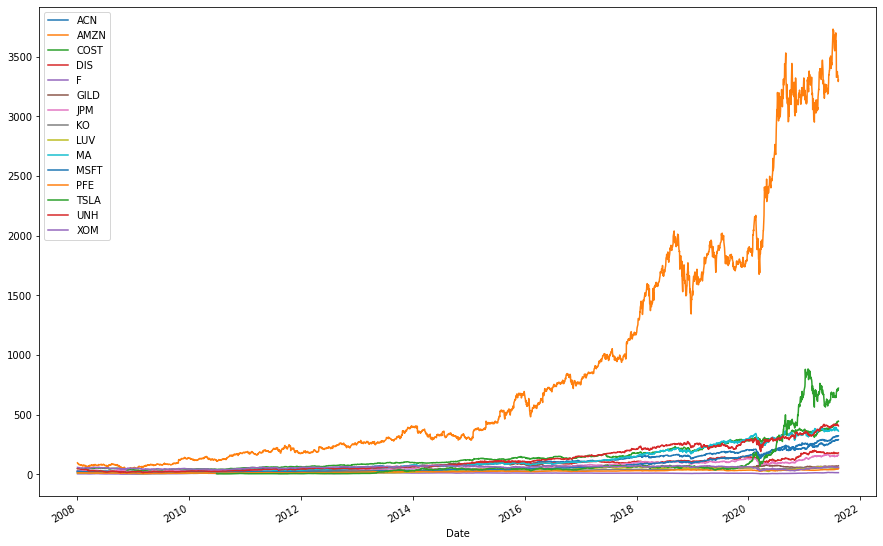

In [5]:
prices[prices.index >= "2008-01-01"].plot(figsize=(15,10));

In [13]:
import pypfopt
pypfopt.__version__

'1.4.2'

In [14]:
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

,ACN,AMZN,COST,DIS,F,GILD,JPM,KO,LUV,MA,MSFT,PFE,TSLA,UNH,XOM
ACN,0.091043,0.044384,0.027081,0.040360,0.042807,0.029350,0.048819,0.020284,0.036725,0.045230,0.040210,0.025825,0.038842,0.030319,0.030852
AMZN,0.044384,0.337693,0.047151,0.054248,0.051611,0.060100,0.066770,0.020104,0.046985,0.055949,0.071684,0.031948,0.055995,0.034987,0.026755
COST,0.027081,0.047151,0.101988,0.031840,0.030923,0.027375,0.038921,0.021124,0.031438,0.032031,0.036869,0.025522,0.023274,0.027349,0.020587
DIS,0.040360,0.054248,0.031840,0.099506,0.040137,0.032803,0.047217,0.026271,0.038829,0.049838,0.042384,0.029745,0.035964,0.032250,0.025564
F,0.042807,0.051611,0.030923,0.040137,0.125282,0.030320,0.054374,0.026304,0.045652,0.062015,0.040796,0.027495,0.048852,0.029189,0.027525
GILD,0.029350,0.060100,0.027375,0.032803,0.030320,0.240346,0.043228,0.016764,0.031555,0.033369,0.035844,0.032919,0.033106,0.034484,0.021525
JPM,0.048819,0.066770,0.038921,0.047217,0.054374,0.043228,0.129562,0.027979,0.049026,0.071121,0.049623,0.033207,0.039070,0.039027,0.033244
KO,0.020284,0.020104,0.021124,0.026271,0.026304,0.016764,0.027979,0.053954,0.023164,0.026385,0.027942,0.026316,0.018802,0.023001,0.020844
LUV,0.036725,0.046985,0.031438,0.038829,0.045652,0.031555,0.049026,0.023164,0.138754,0.047591,0.036704,0.026496,0.035180,0.033007,0.023347
MA,0.045230,0.055949,0.032031,0.049838,0.062015,0.033369,0.071121,0.026385,0.047591,0.119330,0.048996,0.033149,0.046222,0.043809,0.042814


In [15]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(prices)
mu

ACN     0.210439
AMZN    0.361678
COST    0.196518
DIS     0.225923
F       0.225722
GILD    0.260179
JPM     0.255544
KO      0.150128
LUV     0.229660
MA      0.265303
MSFT    0.241435
PFE     0.181169
TSLA    0.281505
UNH     0.223992
XOM     0.142864
Name: mkt, dtype: float64

In [16]:
from pypfopt import EfficientFrontier

In [17]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('ACN', 0.2345),
             ('AMZN', 0.0086),
             ('COST', 0.09893),
             ('DIS', -0.01616),
             ('F', -0.01648),
             ('GILD', 0.04247),
             ('JPM', -0.05082),
             ('KO', 0.12327),
             ('LUV', 0.02379),
             ('MA', 0.23656),
             ('MSFT', 0.00239),
             ('PFE', 0.06338),
             ('TSLA', 0.14518),
             ('UNH', 0.03058),
             ('XOM', 0.07381)])

In [18]:
ef.portfolio_performance(verbose=True);

Annual volatility: 11.8%


In [19]:
from pypfopt import DiscreteAllocation

latest_prices = prices.iloc[-1]  # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=20000, short_ratio=0.3)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

NameError: Solver GLPK_MI is not installed. 